<a href="https://colab.research.google.com/github/BeanieBeta/ds-content-interactive-jupyterlab-tutorial/blob/master/Fake_News_TfidfVectorizer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing relevant libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from numpy import average
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from google.colab import drive
import pickle
import seaborn as sns

In [ ]:
# read the datasets from Google Drive
drive.mount('/content/gdrive')
df_fake=pd.read_csv('/content/gdrive/My Drive/Fake.csv')
df_true=pd.read_csv('/content/gdrive/My Drive/True.csv')

Mounted at /content/gdrive


In [ ]:
# add a 'label' column filled with the booleans False and True for the fake news and true news datasets respectively
df_fake['label'] = False
df_true['label'] = True
# combines and randomizes the two datasets
combine_set = pd.concat([df_fake,df_true]).sample(frac =  1,random_state = 1)

In [ ]:
# Gets the labels from the label column
labels = combine_set.label

In [ ]:
# equally splits the combined dataset into test and training datasets; 
# separates text and label columns from the combined data sets
# uses 80% of each divided part of the dataset as a training set 
# the other 20%s become test sets 
# randomizes divided parts of dataset 7 times
x_train,x_test,y_train,y_test=train_test_split(combine_set['text'], labels, test_size=0.2, random_state=7)

In [ ]:
# this basically starts a feature extraction command that turns text documents into TF-IDF features
# TF-IDF features are bascially words that have been given a numerical value to represent how significant they are
# stop_words='english' removes all english stop words from the text i.e. "a", "an", "the", "be", etc.
# max_df = 0.7 makes it so that all words that appear in more than 70% of the given documents are not included when making the features
# it filters these because at a certain point of commonality, certain words just become noise for the model like stop words; they don't help distinguish False articles from True articles 
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
# Basically applies the above filters to the test and training sets for one category of label
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(x_train)

# Transform the test set 
count_test = count_vectorizer.transform(x_test)

In [ ]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['zzjjpdaivn', 'zzn3bqnfsk', 'zzpx_bzka40police', 'zzqvyk8xif', 'zztaine', 'zzucqevt3m', 'zzuml4hkoc', 'zzzzaaaacccchhh', 'zzzzzzzzzzzzz', 'émigré']


In [ ]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '00000017', '00004', '000048', '00007', '000270', '00042', '0005']


In [ ]:
# initializes a Passive Agressive Classifier machine learning algorithm and assigns it to "pac"; makes it so that this model will go over training data 50 times; 
# the more times a model runs on a training set, the more accurate it is, but it is important not to overfit the model, so 50 is a reasonable number of times to run it through the training set
# passive-aggressive algorithms are a family of machine learning algorithms for large-scale learning(perfect for our datasets with 20,000+ articles)
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
# predict on the test set and calculate accuracy, recall, precision, and f1
y_pred=pac.predict(tfidf_test)
print(f'Accuracy: {round(accuracy_score(y_test,y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test,y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test,y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test,y_pred)*100,2)}%')

Accuracy: 99.42%
Recall: 99.58%
Precision: 99.21%
F1: 99.39%


In [ ]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(accuracy_score(y_test,pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test,pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test,pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test,pred)*100,2)}%')

Accuracy: 94.93%
Recall: 94.49%
Precision: 94.82%
F1: 94.66%


In [ ]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(accuracy_score(y_test,pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test,pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test,pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test,pred)*100,2)}%')

Accuracy: 93.11%
Recall: 92.33%
Precision: 93.1%
F1: 92.71%


In [ ]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(accuracy_score(y_test,pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test,pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test,pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test,pred)*100,2)}%')

Accuracy: 99.35%
Recall: 99.55%
Precision: 99.09%
F1: 99.32%


False -8.172964230377334 read
False -7.513057597005375 image
False -7.378609485154294 featured
False -5.449658693644207 gop
False -5.196667140369247 getty
False -5.137780259136428 just
False -4.558326737464529 hillary
False -4.341554176445653 sen
False -4.319746566771778 com
False -4.096409014617214 watch

True 31.579622296099537 reuters
True 5.158247645776234 nov
True 5.052297131722695 washington
True 4.206104449075915 republican
True 4.055168303518543 wednesday
True 3.8905908427547002 thursday
True 3.8624499470311378 tuesday
True 3.189750818201638 friday
True 3.125710887204936 showed
True 3.092439701923418 comment
[(-8.172964230377334, 'read'), (-7.513057597005375, 'image'), (-7.378609485154294, 'featured'), (-5.449658693644207, 'gop'), (-5.196667140369247, 'getty'), (-5.137780259136428, 'just'), (-4.558326737464529, 'hillary'), (-4.341554176445653, 'sen'), (-4.319746566771778, 'com'), (-4.096409014617214, 'watch')]
[(-8.172964230377334, 'read'), (-7.513057597005375, 'image'), (-7.37

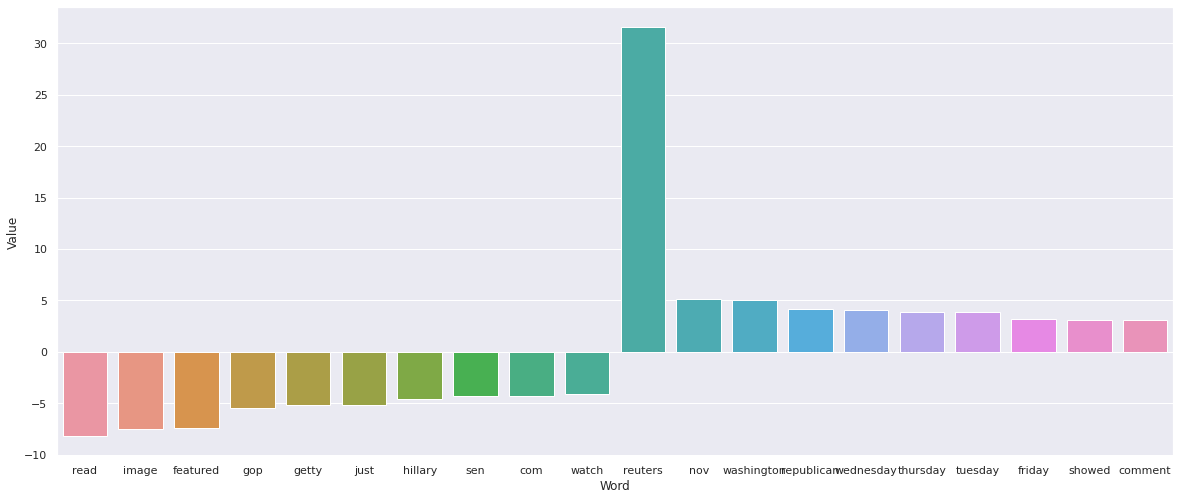

In [ ]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    data = []

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
        data.append([feat, coef])

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)
        data.append([feat, coef])

    print(topn_class1)
    df = pd.DataFrame(data, columns = ['Word', 'Value'])
    print(topn_class1)
    print(df)
    sns.set(rc={'figure.figsize':(20,8.27)})
    graph = sns.barplot(x = 'Word', y = 'Value', data=df, ci=65)
    graph


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=10)

In [ ]:
...
# define input
# Prasanna, you just need to get whatever is input into the text box to replace the string inside of this nested array; we're leaving this to you since the website stuff is more your territory
new_input = [["U.S. citizens are among the dozens killed and injured in a stampede at a religious festival in Israel, the U.S. Embassy said on Saturday, as criticism mounted in the wake of one of the biggest civilian disasters in the country’s history. At least 45 people were crushed to death and more than 100 injured at the ultra-Orthodox Jewish festival on the slopes of Israel’s Mount Meron, held overnight between Thursday and Friday. The exact cause of the disaster is still not clear, but witness accounts and videos posted on social media suggested that some people had fallen down stairs leading out of a narrow passageway packed by hundreds of worshippers trying to exit the site, as a surge of people came down upon those ahead of them who had fallen, being trampled and asphyxiated. One witness described seeing a pyramid of people piling up one on top of the other. Authorities said children were among those hurt. Avigdor Hayut, injured in the crush, lost his 13-year-old son. He said they were caught under a mass of people. 'I was on the floor. Twenty seconds stood between me being with him now, no more. I was already numb and my vision was blurred,' he told reporters before he was released from hospital to attend his son's funeral. 'My son was screaming t to me 'daddy I'm going to die,'' Hayut said. 'They got me out at the last minute.' The Health Ministry said 42 of the dead had been identified by late Saturday. The identification process paused for 24 hours in observance of the Jewish Sabbath and resumed on Saturday evening, and families held late-night burials. Around 20 of the people injured were still in hospital by Friday night. More than 2,000 Israelis across the country responded to an emergency call for blood donations, according to Magen David Adom, Israel's ambulance service. A U.S. Embassy representative said: 'We can confirm that multiple U.S. citizens were among the casualties'. Those included both dead and injured. The U.S. Embassy was trying to verify if any more American citizens were involved and is providing all possible consular support to affected U.S. citizens, the representative said, declining to comment further. The Israeli Foreign Ministry said on Friday that consulate officials in New York were in contact with four families of victims and the Israeli embassy in Argentina was in contact with one family. U.S. media have identified some of the dead, including a 19-year-old American citizen who was in Israel on a gap year. Two Canadians were killed in the disaster, Canadian Prime Minister Justin Trudeau said on Friday. Condolences poured in from leaders around the world, including U.S. President Joe Biden and Palestinian President Mahmoud Abbas. SAFETY CONCERNS The Justice Ministry said investigators would look into whether there had been any police misconduct connected to the tragedy and Prime Minister Benjamin Netanyahu promised a thorough investigation to ensure it did not happen again. Public Security Minister Amir Ohana and Police Commissioner Yaakov Shabtai both said on Saturday they will co-operate fully with any probe. A dozen people protested outside Ohana's home in Tel Aviv, spelling out the word 'shame' with lit candles. There had been concern for years about safety risks at the annual event, held at the tomb of a 2nd-century Jewish sage in the Galilee. Anger has mounted at the government and the police for allowing the event to go ahead despite its size far exceeding the coronavirus restrictions on gatherings. An estimated 100,000 packed the festival. Some critics said politicians had caved to pressures of ultra-Orthodox leaders who are presently allied with Netanyahu but have flouted the state's authority for years. “The government wouldn’t consider any restrictions for fear of its Haredi (ultra-Orthodox) partners. And as far as physical safety was concerned, this year wasn’t any different from previous ones. Warnings of a potential disaster have been heard many times before, including from members of the Haredi community, but the traditions must not be changed,” wrote Anshel Pfeffer, an analyst for the left-wing Haaretz newspaper."]]

In [ ]:
#new_output = clf.predict(new_input)
tfidf_testInput=tfidf_vectorizer.transform(new_input[0])
new_output = clf.predict(tfidf_testInput)
new_output

array([ True])

In [ ]:
sv_t = svm.SVC()
sv_t.fit(tfidf_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pickle.dump([sv_t,average,f1_score], open('complete_ml.pkl', 'wb' ))